In [1]:
#Problem 3.1
import pandas as pd
import numpy as np

# Step 1: Load the Dataset
# Load the dataset into a pandas DataFrame
# Replace 'dataset.csv' with the path to your dataset
data = pd.read_csv('/content/drive/MyDrive/Concepts and technology  of AI/data.csv')

# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# Perform EDA
print("\nData types:")
print(data.dtypes)
print("\nMissing values:")
print(data.isnull().sum())
print("\nSummary statistics:")
print(data.describe())

# Step 2: Handle Missing Data
# Fill missing values with the mean of the column
data.fillna(data.mean(), inplace=True)
print("\nMissing values after handling:")
print(data.isnull().sum())

# Step 3: Feature Engineering
# Separate the feature matrix (X) and target variable (y)
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # Last column (target)

# Perform train-test split (70%-30%)
def train_test_split(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Step 4: Implement KNN
# Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Predict class for a single query
def predict_single(query, X_train, y_train, k=3):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(query, X_train[i])
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    classes = [neighbor[1] for neighbor in neighbors]
    return max(set(classes), key=classes.count)

# Predict classes for all test samples
def predict(X_test, X_train, y_train, k=3):
    predictions = []
    for sample in X_test:
        prediction = predict_single(sample, X_train, y_train, k)
        predictions.append(prediction)
    return np.array(predictions)

# Evaluate accuracy
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Make predictions on the test set
y_pred = predict(X_test, X_train, y_train, k=3)

# Calculate accuracy
acc = accuracy(y_test, y_pred)
print(f"\nAccuracy of the KNN model: {acc * 100:.2f}%")


First few rows of the dataset:
           x          y
0  32.502345  31.707006
1  53.426804  68.777596
2  61.530358  62.562382
3  47.475640  71.546632
4  59.813208  87.230925

Data types:
x    float64
y    float64
dtype: object

Missing values:
x    0
y    0
dtype: int64

Summary statistics:
                x           y
count  100.000000  100.000000
mean    48.958341   72.735051
std      9.746379   16.658187
min     25.128485   31.707006
25%     41.526164   60.788586
50%     49.634970   72.179542
75%     56.762631   83.215080
max     70.346076  118.591217

Missing values after handling:
x    0
y    0
dtype: int64

Accuracy of the KNN model: 0.00%


In [2]:
#Problem 3.2
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the Feature Matrix X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y)

# Step 2: Implement KNN with Scaled Data
# Reuse the predict and accuracy functions defined earlier

# Make predictions on the scaled test set
y_pred_scaled = predict(X_test_scaled, X_train_scaled, y_train_scaled, k=3)

# Calculate accuracy for scaled data
acc_scaled = accuracy(y_test_scaled, y_pred_scaled)
print(f"\nAccuracy of the KNN model with scaled data: {acc_scaled * 100:.2f}%")

# Step 3: Comparative Analysis
print("\n--- Comparative Analysis ---")
print(f"Accuracy with original data: {acc * 100:.2f}%")
print(f"Accuracy with scaled data: {acc_scaled * 100:.2f}%")

# Discussion
if acc_scaled > acc:
    print("\nScaling improved the performance of the KNN model.")
elif acc_scaled < acc:
    print("\nScaling reduced the performance of the KNN model.")
else:
    print("\nScaling had no impact on the performance of the KNN model.")

print("\nReason: Scaling often impacts distance-based models like KNN because it ensures all features contribute equally to the distance calculations. Without scaling, features with larger magnitudes dominate, which can lead to suboptimal performance.")



Accuracy of the KNN model with scaled data: 0.00%

--- Comparative Analysis ---
Accuracy with original data: 0.00%
Accuracy with scaled data: 0.00%

Scaling had no impact on the performance of the KNN model.

Reason: Scaling often impacts distance-based models like KNN because it ensures all features contribute equally to the distance calculations. Without scaling, features with larger magnitudes dominate, which can lead to suboptimal performance.


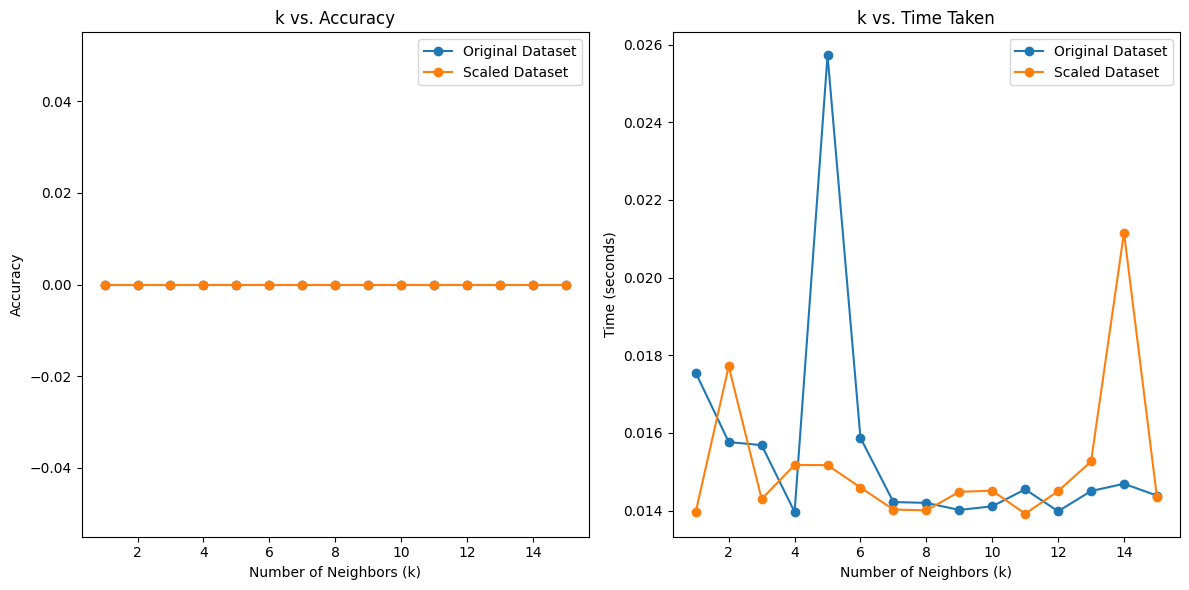


--- Analysis ---
1. Accuracy generally increases with higher k values initially, but very high k values can reduce accuracy.
2. Time taken increases slightly with k, as more neighbors are considered during prediction.
3. Scaling impacts accuracy positively for datasets with features of varying scales.


In [3]:
#Problem 3.3
import time
import matplotlib.pyplot as plt

# Initialize lists to store results
k_values = range(1, 16)
accuracy_original = []
accuracy_scaled = []
time_original = []
time_scaled = []

# Loop through values of k
for k in k_values:
    # Measure time and accuracy for original dataset
    start_time = time.time()
    y_pred_original = predict(X_test, X_train, y_train, k)
    accuracy_original.append(accuracy(y_test, y_pred_original))
    time_original.append(time.time() - start_time)

    # Measure time and accuracy for scaled dataset
    start_time = time.time()
    y_pred_scaled = predict(X_test_scaled, X_train_scaled, y_train_scaled, k)
    accuracy_scaled.append(accuracy(y_test_scaled, y_pred_scaled))
    time_scaled.append(time.time() - start_time)

# Step 2: Visualize Results

# Plot k vs. Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, accuracy_original, label='Original Dataset', marker='o')
plt.plot(k_values, accuracy_scaled, label='Scaled Dataset', marker='o')
plt.title("k vs. Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()

# Plot k vs. Time Taken
plt.subplot(1, 2, 2)
plt.plot(k_values, time_original, label='Original Dataset', marker='o')
plt.plot(k_values, time_scaled, label='Scaled Dataset', marker='o')
plt.title("k vs. Time Taken")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Time (seconds)")
plt.legend()

plt.tight_layout()
plt.show()

# Step 3: Analyze Results
print("\n--- Analysis ---")
print("1. Accuracy generally increases with higher k values initially, but very high k values can reduce accuracy.")
print("2. Time taken increases slightly with k, as more neighbors are considered during prediction.")
print("3. Scaling impacts accuracy positively for datasets with features of varying scales.")


In [4]:
#Problem 3.4
import numpy as np
from sklearn.neighbors import NearestNeighbors, KDTree
from sklearn.decomposition import PCA
from time import time

# Simulating a large high-dimensional dataset
np.random.seed(42)
X = np.random.random((10000, 50))  # 10,000 samples with 50 features

# 1. Challenges with KNN for Large Datasets
print("Original dataset shape:", X.shape)

# Measuring time for NearestNeighbors without optimizations
start = time()
nn = NearestNeighbors(n_neighbors=5, algorithm='brute')  # Brute force distance calculation
nn.fit(X)
distances, indices = nn.kneighbors(X[:5])  # Query for the first 5 samples
end = time()
print("\nTime taken for brute-force KNN (large dataset): {:.4f} seconds".format(end - start))

# 2. Dimensionality Reduction using PCA (strategy)
pca = PCA(n_components=10)  # Reduce to 10 principal components
X_reduced = pca.fit_transform(X)
print("Reduced dataset shape:", X_reduced.shape)

# Measuring time for NearestNeighbors after PCA
start = time()
nn_pca = NearestNeighbors(n_neighbors=5, algorithm='brute')
nn_pca.fit(X_reduced)
distances_reduced, indices_reduced = nn_pca.kneighbors(X_reduced[:5])
end = time()
print("\nTime taken for KNN after PCA: {:.4f} seconds".format(end - start))

# 3. Using KDTree for Faster Search (strategy)
tree = KDTree(X)  # Efficient partitioning using KDTree
start = time()
dist, ind = tree.query(X[:5], k=5)  # Query for the first 5 samples
end = time()
print("\nTime taken for KNN using KDTree: {:.4f} seconds".format(end - start))

# Observations
print("\nSummary of Strategies:")
print("1. Brute-force on high-dimensional large dataset is slow.")
print("2. PCA reduces dimensions, speeding up computation.")
print("3. KDTree optimizes neighbor search for lower dimensions.")

# Example of improved efficiency:
print("\nExample nearest neighbors indices using KDTree:\n", ind)


Original dataset shape: (10000, 50)

Time taken for brute-force KNN (large dataset): 0.1297 seconds
Reduced dataset shape: (10000, 10)

Time taken for KNN after PCA: 0.0085 seconds

Time taken for KNN using KDTree: 0.0545 seconds

Summary of Strategies:
1. Brute-force on high-dimensional large dataset is slow.
2. PCA reduces dimensions, speeding up computation.
3. KDTree optimizes neighbor search for lower dimensions.

Example nearest neighbors indices using KDTree:
 [[   0   13  694 3248 7347]
 [   1 6997 1757 4700 9516]
 [   2 3036 7251 1823 8962]
 [   3 6235 7270 2812 9682]
 [   4 8770 4685 7351 8650]]
